In [1]:
import numpy as np
import skfuzzy as sk
from skfuzzy import control as ctrl

In [2]:
temperature = ctrl.Antecedent(np.arange(0,40, 0.1), 'temperature')
valvule = ctrl.Consequent(np.arange(0, 1, 0.1), 'valvule')

In [3]:
temperature['cold'] = sk.trapmf(temperature.universe, [0, 0, 18, 22])
temperature['warm'] = sk.trimf(temperature.universe, [18, 24, 30])
temperature['hot'] = sk.trapmf(temperature.universe, [26, 30, 40, 40])

In [5]:
valvule['close'] = sk.trapmf(valvule.universe, [0.0, 0.0, 0.3, 0.7])
valvule['open'] = sk.trapmf(valvule.universe, [0.3, 0.7, 1.0, 1.0])

/Users/cmillan/opt/anaconda3/envs/py38/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


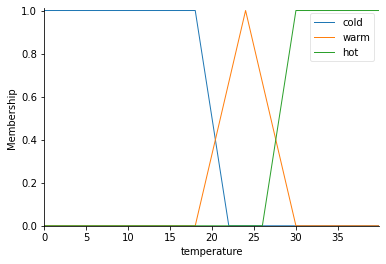

In [6]:
temperature.view()

/Users/cmillan/opt/anaconda3/envs/py38/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


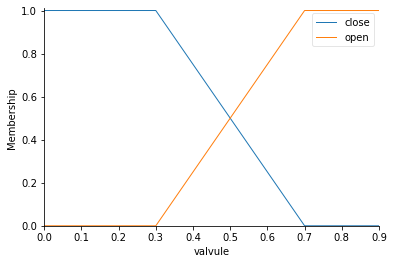

In [7]:
valvule.view()

In [8]:
rule1 = ctrl.Rule(temperature['cold'], valvule['open'])
rule2 = ctrl.Rule(temperature['warm'] , valvule['open'], (valvule['close']))
rule3 = ctrl.Rule(temperature['hot'], valvule['close'])

In [25]:
green_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [26]:
green = ctrl.ControlSystemSimulation(green_ctrl)

In [27]:
green.input['temperature'] = 29.0 

In [28]:
green.compute()

In [29]:
print(green.output['valvule'])

0.32691131498470954


/Users/cmillan/opt/anaconda3/envs/py38/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


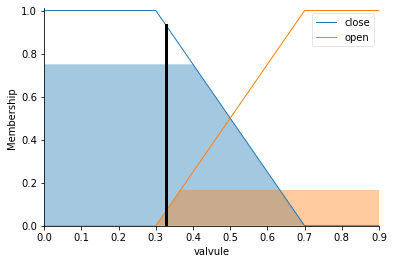

In [30]:
valvule.view(sim=green)